In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from highlight_text import ax_text,fig_text
import mplsoccer
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Scrapping Data from Fbref
def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]

    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df

In [3]:
df_fbref_shoot = readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')

In [4]:
df_fbref_shoot.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Ismael Aaneba,FRA,"FW,DF",Strasbourg,Ligue 1,21,1999,0.1,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
2,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,29,1990,19.7,0,18,...,20.3,3,0,0,1.2,1.2,0.07,-1.2,-1.2,Matches
3,Issah Abbas,GHA,"DF,FW",Mainz 05,Bundesliga,21,1998,0.2,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
4,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,32,1987,32.1,3,15,...,10.2,0,0,0,1.7,1.7,0.11,1.3,1.3,Matches
5,Sabit Abdulai,GHA,MF,Getafe,La Liga,21,1999,0.7,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches


In [5]:
df_fbref_pass=pd.read_csv('D:\FOOTBALL ANALYTICS\Big5_passing_players_Big-5-European-Leagues-Stats.csv')

In [6]:
df_fbref_pass.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp_total,Att_total,...,Att_long,long_Cmp%,Ast,xA,A-xA,KP,Final-Third,PPA,CrsPA,Prog
0,Ismael Aaneba,FRA,"FW,DF",Strasbourg,Ligue 1,21,1999,0.1,2,2,...,1,100.0,0,0.0,0.0,0,0,0,0,0
1,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,29,1990,19.7,889,1127,...,151,51.7,1,0.8,0.2,11,68,26,4,112
2,Issah Abbas,GHA,"DF,FW",Mainz 05,Bundesliga,21,1998,0.2,13,15,...,2,100.0,0,0.0,0.0,0,1,0,0,1
3,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,32,1987,32.1,1506,1715,...,366,73.0,0,0.3,-0.3,4,81,1,0,91
4,Sabit Abdulai,GHA,MF,Getafe,La Liga,21,1999,0.7,7,12,...,3,33.3,0,0.0,0.0,0,0,1,0,1


In [7]:
df_fbref_gca = readfromhtml('https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats')

In [8]:
df_fbref_gca.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,SCA,SCA90,...,Def,GCA,GCA90,PassLive,PassDead,Drib,Sh,Fld,Def,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Ismael Aaneba,FRA,"FW,DF",Strasbourg,Ligue 1,21,1999,0.1,0,0.00,...,0,0,0.00,0,0,0,0,0,0,Matches
2,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,29,1990,19.7,26,1.32,...,0,3,0.15,2,1,0,0,0,0,Matches
3,Issah Abbas,GHA,"DF,FW",Mainz 05,Bundesliga,21,1998,0.2,0,0.00,...,0,0,0.00,0,0,0,0,0,0,Matches
4,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,32,1987,32.1,11,0.34,...,0,0,0.00,0,0,0,0,0,0,Matches
5,Sabit Abdulai,GHA,MF,Getafe,La Liga,21,1999,0.7,0,0.00,...,0,0,0.00,0,0,0,0,0,0,Matches


In [9]:
df_fbref_drbl=pd.read_csv('D:\FOOTBALL ANALYTICS\Big5_dribbling_players_Big-5-European-Leagues-Stats.csv')

In [10]:
df_fbref_drbl.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen',
       'Live', 'Succ_Dribbles', 'Att_Dribbles', 'Succ%', '#Pl', 'Megs',
       'Carries', 'TotDist', 'PrgDist', 'Prog_Carries', '1/3', 'CPA', 'Mis',
       'Dis', 'Targ', 'Rec', 'Rec%', 'Prog', 'Matches'],
      dtype='object')

In [11]:
df_fbref_passtype=readfromhtml('https://fbref.com/en/comps/Big5/passing_types/players/Big-5-European-Leagues-Stats')

In [12]:
df_fbref_passtype.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s', 'Att',
       'Live', 'Dead', 'FK', 'TB', 'Press', 'Sw', 'Crs', 'CK', 'In', 'Out',
       'Str', 'Ground', 'Low', 'High', 'Left', 'Right', 'Head', 'TI', 'Other',
       'Cmp', 'Off', 'Out', 'Int', 'Blocks', 'Matches'],
      dtype='object')

In [13]:
df_fbref_passtype=df_fbref_passtype[['Player','Pos','90s','Press']]
df_fbref_passtype

,Player,Pos,90s,Press
Rk,,,,
1,Ismael Aaneba,"FW,DF",0.1,0
2,Patrick van Aanholt,DF,19.7,112
3,Issah Abbas,"DF,FW",0.2,0
4,Yunis Abdelhamid,DF,32.1,168
5,Sabit Abdulai,MF,0.7,7
...,...,...,...,...
2819,Steven Zuber,"DF,MF",6.5,69
2820,Martín Zubimendi,MF,20.9,177
2821,Martin Ødegaard,MF,9.6,72


In [14]:
df_fbref_passtype['Press/90s']=df_fbref_passtype['Press']/df_fbref_passtype['90s']
df_fbref_passtype

,Player,Pos,90s,Press,Press/90s
Rk,,,,,
1,Ismael Aaneba,"FW,DF",0.1,0,0.000000
2,Patrick van Aanholt,DF,19.7,112,5.685279
3,Issah Abbas,"DF,FW",0.2,0,0.000000
4,Yunis Abdelhamid,DF,32.1,168,5.233645
5,Sabit Abdulai,MF,0.7,7,10.000000
...,...,...,...,...,...
2819,Steven Zuber,"DF,MF",6.5,69,10.615385
2820,Martín Zubimendi,MF,20.9,177,8.468900
2821,Martin Ødegaard,MF,9.6,72,7.500000


In [15]:
df_fbref_passtype[df_fbref_passtype['Player']=='Jadon Sancho']

,Player,Pos,90s,Press,Press/90s
Rk,,,,,
2335,Jadon Sancho,"FW,MF",22.9,199,8.689956


In [16]:
background = '#000000'
text_color = 'white'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Georgia'
mpl.rcParams['legend.fontsize'] = 15

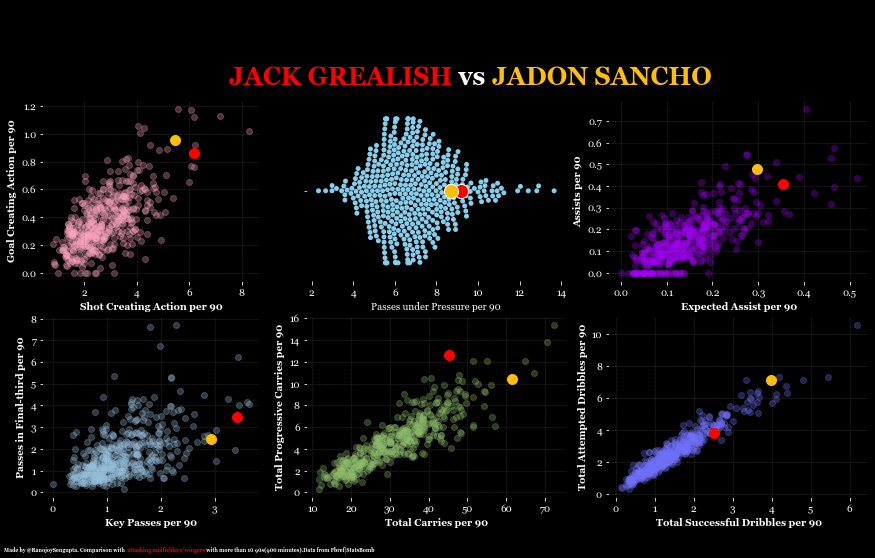

In [28]:
import seaborn as sns
# SETTING UP THE AXES
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('off')
fig.set_facecolor(background)


# Plotting the Key Passes per 90 vs Passes in final third per 90
ax_scatter = fig.add_axes([0.045,0.2,0.25,0.25])
ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref_pass[df_fbref_pass['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW,MF', 'FW', 'MF,FW'])]

x,y = (df_fil['KP']/df_fil['90s']).to_list(), (df_fil['Final-Third']/df_fil['90s']).to_list()

ax_scatter.scatter(x,y,alpha=0.3,c='#99c1de')

# Filtering the player's data (Jack Grealish) 
df_player = df_fil[df_fil['Player']=='Jack Grealish']
ax_scatter.scatter(df_player['KP']/df_player['90s'], df_player['Final-Third']/df_player['90s'],s=100, c='red')

# Filtering the player's data (Jadon Sancho) 
df_player2 = df_fil[df_fil['Player']=='Jadon Sancho']
ax_scatter.scatter(df_player2['KP']/df_player2['90s'], df_player2['Final-Third']/df_player2['90s'],s=100, c='#ffbe0b')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter.grid(b = True, color ='grey',
            linestyle ='--', linewidth = 0.5,
            alpha = 0.4)
ax_scatter.set_xlabel('Key Passes per 90', fontdict = {'fontsize':10, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Passes in Final-third per 90', fontdict = dict(fontsize = 10, weight = 'bold',color=text_color))





# Plotting the passes attempted vs completed
ax_scatter1 = fig.add_axes((0.35, 0.2, 0.3, 0.25))
ax_scatter1.patch.set_facecolor(background)

no_90s = 10
df_fil = df_fbref_drbl[df_fbref_drbl['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW,MF', 'FW', 'MF,FW'])]

x,y = (df_fil['Carries']/df_fil['90s']).to_list(), (df_fil['Prog_Carries']/df_fil['90s']).to_list()

ax_scatter1.scatter(x,y,alpha=0.3,c='#90be6d')

# Filtering the player's data (Jack Grealish) 
df_player = df_fil[df_fil['Player']=='Jack Grealish']
ax_scatter1.scatter(df_player['Carries']/df_player['90s'], df_player['Prog_Carries']/df_player['90s'],s=100,c='red')

# Filtering the player's data (Jadon Sancho) 
df_player2 = df_fil[df_fil['Player']=='Jadon Sancho']
ax_scatter1.scatter(df_player2['Carries']/df_player2['90s'], df_player2['Prog_Carries']/df_player2['90s'],s=100,c='#ffbe0b')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter1.grid(b = True, color ='grey',
            linestyle ='--', linewidth = 0.5,
            alpha = 0.4)
ax_scatter1.set_xlabel('Total Carries per 90', fontdict = {'fontsize':10, 'weight' : 'bold', 'color':text_color})
ax_scatter1.set_ylabel('Total Progressive Carries per 90', fontdict = dict(fontsize = 10, weight = 'bold',color=text_color))




# Plotting the passes attempted vs progressive passes
ax_scatter1 = fig.add_axes((0.7, 0.2, 0.3, 0.25))
ax_scatter1.patch.set_facecolor(background)

no_90s = 10
df_fil = df_fbref_drbl[df_fbref_drbl['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW,MF', 'FW', 'MF,FW'])]

x,y = (df_fil['Succ_Dribbles']/df_fil['90s']).to_list(), (df_fil['Att_Dribbles']/df_fil['90s']).to_list()

ax_scatter1.scatter(x,y,alpha=0.3,c='#7371fc')

# Filtering the player's data (Jack Grealish) 
df_player = df_fil[df_fil['Player']=='Jack Grealish']
ax_scatter1.scatter(df_player['Succ_Dribbles']/df_player['90s'], df_player['Att_Dribbles']/df_player['90s'],s=100, c='red')

# Filtering the player's data (Jadon Sancho) 
df_player2 = df_fil[df_fil['Player']=='Jadon Sancho']
ax_scatter1.scatter(df_player2['Succ_Dribbles']/df_player2['90s'], df_player2['Att_Dribbles']/df_player2['90s'],s=100, c='#ffbe0b')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter1.grid(b = True, color ='grey',
            linestyle ='--', linewidth = 0.5,
            alpha = 0.4)
ax_scatter1.set_xlabel('Total Successful Dribbles per 90', fontdict = {'fontsize':10, 'weight' : 'bold', 'color':text_color})
ax_scatter1.set_ylabel('Total Attempted Dribbles per 90', fontdict = dict(fontsize = 10, weight = 'bold',color=text_color))









# Plotting the expected assists per 90 vs assists per 90
ax_scatter = fig.add_axes([0.7,0.5,0.3,0.25])
ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref_pass[df_fbref_pass['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW,MF', 'FW', 'MF,FW'])]

x,y = (df_fil['xA']/df_fil['90s']).to_list(), (df_fil['Ast']/df_fil['90s']).to_list()

ax_scatter.scatter(x,y,alpha=0.3,c='#a100f2')

# Filtering the player's data (Jack Grealish) 
df_player = df_fil[df_fil['Player']=='Jack Grealish']
ax_scatter.scatter(df_player['xA']/df_player['90s'], df_player['Ast']/df_player['90s'],s=100, c='red')

# Filtering the player's data (Jadon Sancho) 
df_player2 = df_fil[df_fil['Player']=='Jadon Sancho']
ax_scatter.scatter(df_player2['xA']/df_player2['90s'], df_player2['Ast']/df_player2['90s'],s=100, c='#ffbe0b')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter.grid(b = True, color ='grey',
            linestyle ='--', linewidth = 0.5,
            alpha = 0.4)
ax_scatter.set_xlabel('Expected Assist per 90', fontdict = {'fontsize':10, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Assists per 90', fontdict = dict(fontsize = 10, weight = 'bold',color=text_color))



#Plotting the swarm plot
ax = fig.add_axes([0.35,0.5,0.3,0.25])
fig.set_facecolor(background)
ax.patch.set_facecolor(background)


#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

ax.grid(ls='dotted',lw=1,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

no_90s = 10
df_fil = df_fbref_passtype[df_fbref_passtype['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW,MF', 'FW', 'MF,FW'])]

        

sns.swarmplot(x='Press/90s',data=df_fil,color='skyblue',zorder=1)

#plot Grealish
plt.scatter(x=9.176955,y=0,c='red',edgecolor='white',s=200,zorder=2)
#plt.text(s='Thiago',x=9.87,y=-.04,c=text_color)

#plot Sancho
plt.scatter(x=8.689956,y=0,c='#ffbe0b',edgecolor='white',s=200,zorder=2)


plt.xlabel('Passes under Pressure per 90',c=text_color)







# Plotting the SCA per 90 vs GCA per 90
ax_scatter = fig.add_axes([0.045,0.5,0.25,0.25])
ax_scatter.patch.set_facecolor(background)

# SETTING UP THE X AND Y OF THE SCATTERPLOT
no_90s = 10
df_fil = df_fbref_gca[df_fbref_gca['90s']>=no_90s]
df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in ['FW,MF', 'FW', 'MF,FW'])]

x,y = (df_fil['SCA']/df_fil['90s']).to_list(), (df_fil['GCA']/df_fil['90s']).to_list()

ax_scatter.scatter(x,y,alpha=0.3,c='#ffa6c1')

# Filtering the player's data (Bruno Fernandes) 
df_player = df_fil[df_fil['Player']=='Jack Grealish']
ax_scatter.scatter(df_player['SCA']/df_player['90s'], df_player['GCA']/df_player['90s'],s=100, c='red')

# Filtering the player's data (Jadon Sancho) 
df_player2 = df_fil[df_fil['Player']=='Jadon Sancho']
ax_scatter.scatter(df_player2['SCA']/df_player2['90s'], df_player2['GCA']/df_player2['90s'],s=100, c='#ffbe0b')

# ADDING FINISHING TOUCHES TO THE SCATTERPLOT
ax_scatter.grid(b = True, color ='grey',
            linestyle ='--', linewidth = 0.5,
            alpha = 0.4)
ax_scatter.set_xlabel('Shot Creating Action per 90', fontdict = {'fontsize':10, 'weight' : 'bold', 'color':text_color})
ax_scatter.set_ylabel('Goal Creating Action per 90', fontdict = dict(fontsize = 10, weight = 'bold',color=text_color))










# Adding titles
fig_text(0.26,0.80,"<JACK GREALISH> vs <JADON SANCHO>",weight='heavy', size=25, highlight_textprops=[{'color':'red'},{'color':'#ffbe0b'}])




# ADDING A FOOTER
fig_text(0,0.13,'Made by @RanojoySengupta. Comparison with < attacking midfielders/wingers>'+
        ' with more than '+str(no_90s)+' 90s('+str(no_90s*90)+' minutes).Data from Fbref|StatsBomb',
        size=5, highlight_textprops=[{'color':'red'}], weight = 'bold')


#plt.savefig('GrealishvsSancho.png',dpi=300,facecolor=background)